## data set (house_price)

In [306]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)

(20640, 8) (20640,)


In [307]:
print(housing.feature_names[0:6])# we don't need latitude and longitude


['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


In [308]:
print(housing.target_names)

['MedHouseVal']


  - `x_train` is the x label (['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
)

In [309]:
x_label = housing.data[0::, 0:6] # the first [] is specifly W and second one are column
print("Type of x_train:", type(x_label))
print("Shape of x_train:", x_label.shape)
print(x_label[0:9])


Type of x_train: <class 'numpy.ndarray'>
Shape of x_train: (20640, 6)
[[8.32520000e+00 4.10000000e+01 6.98412698e+00 1.02380952e+00
  3.22000000e+02 2.55555556e+00]
 [8.30140000e+00 2.10000000e+01 6.23813708e+00 9.71880492e-01
  2.40100000e+03 2.10984183e+00]
 [7.25740000e+00 5.20000000e+01 8.28813559e+00 1.07344633e+00
  4.96000000e+02 2.80225989e+00]
 [5.64310000e+00 5.20000000e+01 5.81735160e+00 1.07305936e+00
  5.58000000e+02 2.54794521e+00]
 [3.84620000e+00 5.20000000e+01 6.28185328e+00 1.08108108e+00
  5.65000000e+02 2.18146718e+00]
 [4.03680000e+00 5.20000000e+01 4.76165803e+00 1.10362694e+00
  4.13000000e+02 2.13989637e+00]
 [3.65910000e+00 5.20000000e+01 4.93190661e+00 9.51361868e-01
  1.09400000e+03 2.12840467e+00]
 [3.12000000e+00 5.20000000e+01 4.79752705e+00 1.06182380e+00
  1.15700000e+03 1.78825348e+00]
 [2.08040000e+00 4.20000000e+01 4.29411765e+00 1.11764706e+00
  1.20600000e+03 2.02689076e+00]]


  - `Y_train` is the house price (in 100k unit)

In [310]:
y_label = housing.target[0::]
print("Type of x_train:", type(y_label))
print("Shape of x_train:", y_label.shape)
print(y_label[0:4])

Type of x_train: <class 'numpy.ndarray'>
Shape of x_train: (20640,)
[4.526 3.585 3.521 3.413]


#### Check the dimensions of your variables

Another useful way to get familiar with your data is to view its dimensions.

print the shape of `x_train` and `y_train` to see how many training examples i have in my dataset.

In [311]:
print ('The shape of x_label is:', x_label.shape)
print ('The shape of y_label is: ', y_label.shape)
print ('Number of label examples (m):', len(x_label))

The shape of x_label is: (20640, 6)
The shape of y_label is:  (20640,)
Number of label examples (m): 20640


## create vector

In [312]:
import numpy as np
X_train = np.array(x_label, dtype=np.float32)
X_train = X_train.ravel().reshape(-1, 6)
y_train = np.array(y_label, dtype=np.float32)
y_train = y_train.ravel()

print(f"X Shape: {X_train.shape}, X Type:{type(X_train)})")
print(X_train)
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")
print(y_train)

X Shape: (20640, 6), X Type:<class 'numpy.ndarray'>)
[[8.3252001e+00 4.1000000e+01 6.9841270e+00 1.0238096e+00 3.2200000e+02
  2.5555556e+00]
 [8.3014002e+00 2.1000000e+01 6.2381372e+00 9.7188050e-01 2.4010000e+03
  2.1098418e+00]
 [7.2574000e+00 5.2000000e+01 8.2881355e+00 1.0734463e+00 4.9600000e+02
  2.8022599e+00]
 ...
 [1.7000000e+00 1.7000000e+01 5.2055426e+00 1.1200924e+00 1.0070000e+03
  2.3256352e+00]
 [1.8672000e+00 1.8000000e+01 5.3295131e+00 1.1719198e+00 7.4100000e+02
  2.1232092e+00]
 [2.3886001e+00 1.6000000e+01 5.2547169e+00 1.1622641e+00 1.3870000e+03
  2.6169810e+00]]
y Shape: (20640,), y Type:<class 'numpy.ndarray'>)
[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [313]:
def compute_cost(X,y,w,b):
    m = X.shape[0]

    cost = 0 

    for i in range(m):
        f_w = np.dot(X[i], w) + b
        cost = cost + (f_w - y[i])**2
    cost = (1 / (2*m)) * cost # totalcost
    return cost

<a name="toc_40291_2.3"></a>
### compute_gradient
<a name='ex-01'></a>
`compute_gradient`  implements (4) and (5) above and returns $\frac{\partial J(w,b)}{\partial w}$,$\frac{\partial J(w,b)}{\partial b}$. The embedded comments describe the operations.

In [314]:
def compute_gradient(X, y, w, b): 
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [315]:
import math, copy
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b) 
        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw              
        b = b - alpha * dj_db              
        # Save cost J at each iteration
        if i<100000:      
            J_history.append( cost_function(X, y, w, b))

        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history 

In [316]:
# initialize fitting parameters. Recall that the shape of w is (n,)
# initialize parameters
initial_w = np.zeros((6,))
initial_b = 0.
# set hyperparameters
iterations = 3000
alpha = 1.0e-7
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                            compute_cost, compute_gradient, 
                                            alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

Iteration    0: Cost     2.10   


Iteration  300: Cost     1.50   
Iteration  600: Cost     1.47   
Iteration  900: Cost     1.45   
Iteration 1200: Cost     1.42   
Iteration 1500: Cost     1.40   
Iteration 1800: Cost     1.38   
Iteration 2100: Cost     1.36   
Iteration 2400: Cost     1.34   
Iteration 2700: Cost     1.32   
b,w found by gradient descent: 0.00,[0.00133512 0.00785433 0.00142296 0.00025168 0.00078698 0.00040121] 


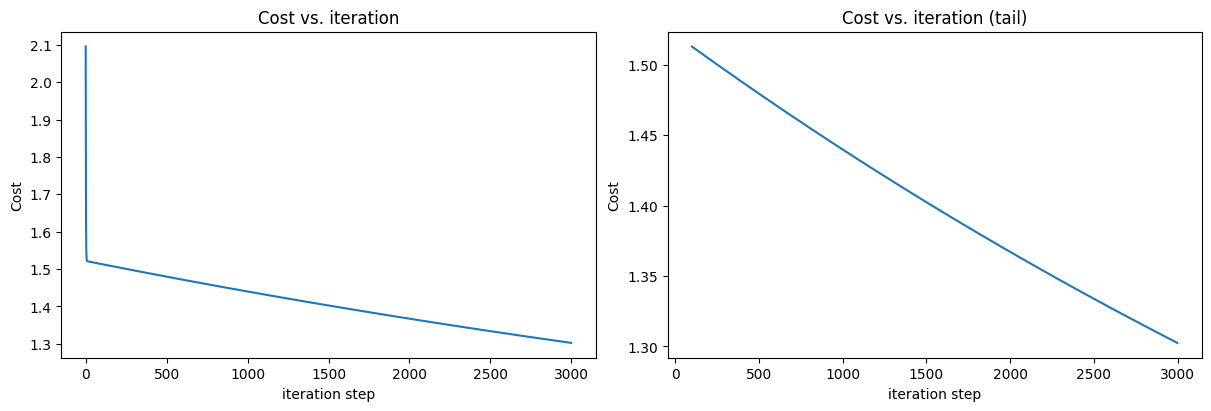

In [319]:
import matplotlib.pyplot as plt
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

In [318]:
m,_ = X_train.shape
for i in range(10):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

prediction: 0.60, target value: 4.526000022888184
prediction: 2.08, target value: 3.5850000381469727
prediction: 0.82, target value: 3.5209999084472656
prediction: 0.86, target value: 3.4130001068115234
prediction: 0.87, target value: 3.421999931335449
prediction: 0.75, target value: 2.697000026702881
prediction: 1.28, target value: 2.992000102996826
prediction: 1.33, target value: 2.4140000343322754
prediction: 1.29, target value: 2.2669999599456787
prediction: 1.64, target value: 2.6110000610351562
